# Temperatura ambiente: pGe

Variabili:
- tempo della singola acquisizione [0e1, 0e5, 0e9, 0e25]
- numero di prese dati [1, 2, 3, 5, 8, 15]
- filtro utilizzato [0e01pc, 0e05pc, 0e1pc, ...]
- fenditura

Fissi:
- 300K
- 35lmm (grating)
- .asc (formato file)
- 1064nm (lambda laser eccitazione)

## Importazioni

In [1]:
from qp2_subroutines import *
import os

In [2]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

In [3]:
def build_name_pGe (t_acq: str, n_acq:str=None, fen=None, filtro='50pc', T='300K', lmm='35lmm'):
    # t_acq == 0e1
    # n_acq == 5
    # grating == 35lmm
    # ecc=None, fen=None
    
    cartella = 'data/T_room_300K_pGe_e_GaSb/'
    
    if fen is None:
        name = 'Giak_' + t_acq + '_' + n_acq + '_1064nm_' + T + '_' + filtro + '_pGe_35lmm.asc'
    else:
        name = 'Giak_' + t_acq + '_' + fen + '_' + T + '_' + filtro + '_pGe_35lmm.asc'
        
    return cartella+name

---

---

# Analisi - _Ge drogato p_

## pGe su INTENSITÀ

In [4]:
# NO, SEMPRE FATTO CON 50pc

---

## pGe su FENDITURA

#### Contenitore per i dati

In [5]:
pGe_fen = {}

arr_fen = ['8_fen0e5', '8_fen1mm', '2_fen1e5', '8_fen2mm']

#### Lettura file

In [6]:
for fen in arr_fen:
    
    # Costruisco nome file
    name = build_name_pGe (t_acq='0e5', fen=fen)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts)
    # Raccolgo
    pGe_fen[fen] = (waveln, counts)

#### Plot 

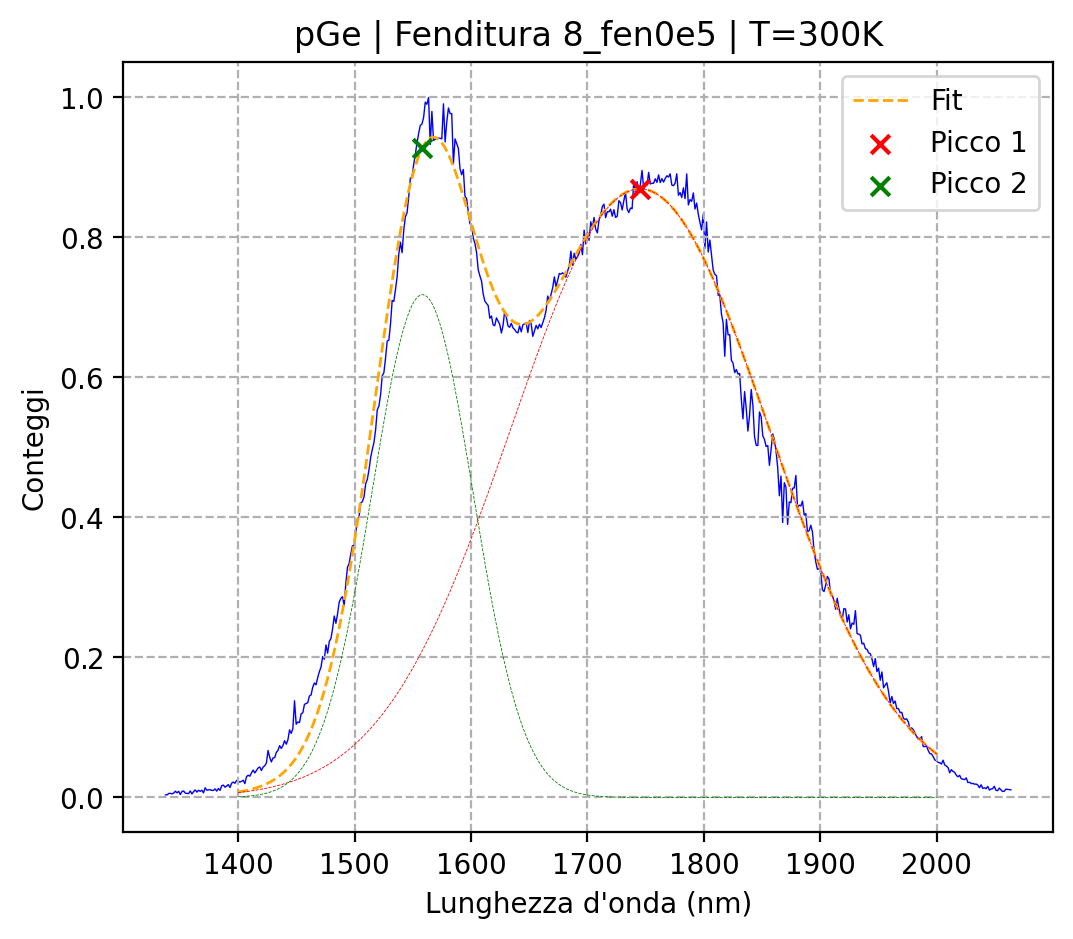

• Gaussiana  1
 - A = 0.8693321440783403
 - mu = 1745.192028555957
 - sigma = 110.89061014075108
• Gaussiana  2
 - A = 0.7182210716750008
 - mu = 1558.3500769579484
 - sigma = 43.404985737866774
 - chi2rid = 0.6053801537123442


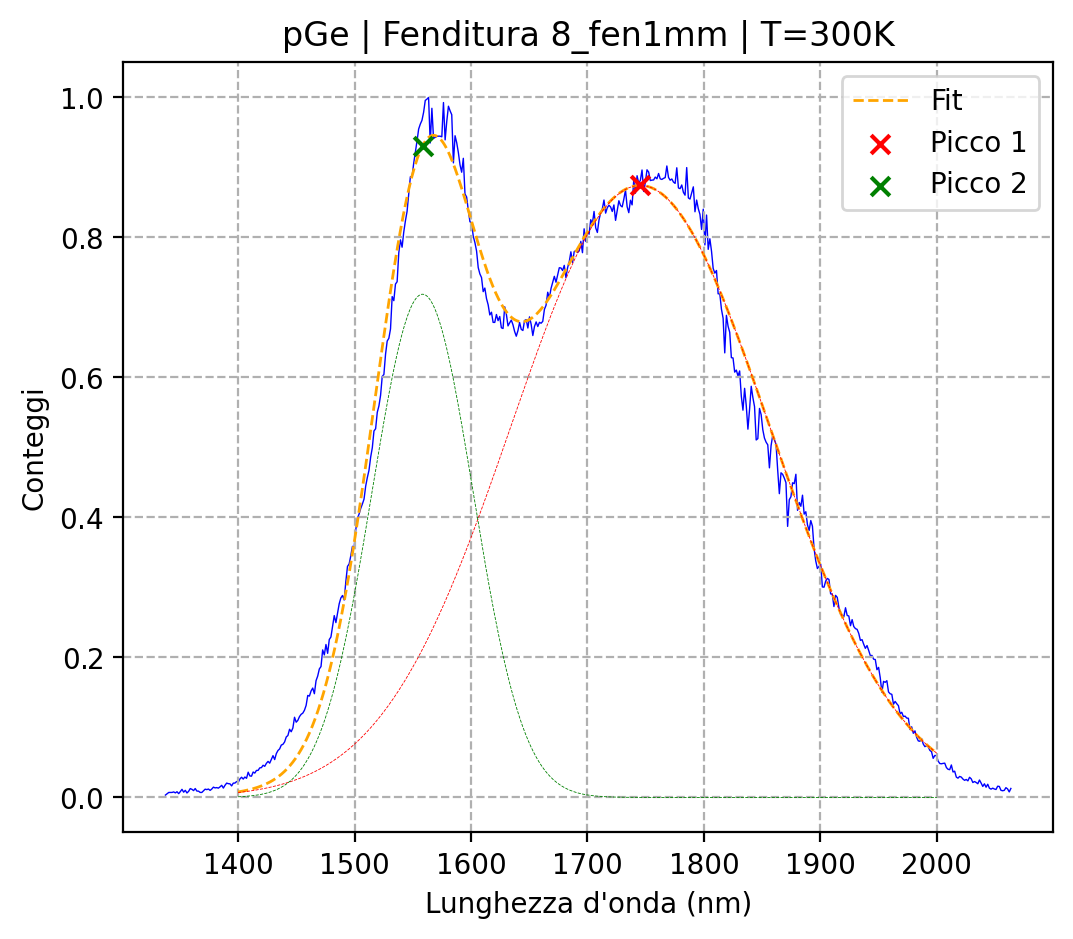

• Gaussiana  1
 - A = 0.8743150180326363
 - mu = 1745.3873687395208
 - sigma = 111.07413648520206
• Gaussiana  2
 - A = 0.7189161286084074
 - mu = 1558.4167242490857
 - sigma = 43.43545993900585
 - chi2rid = 0.5894785333705248


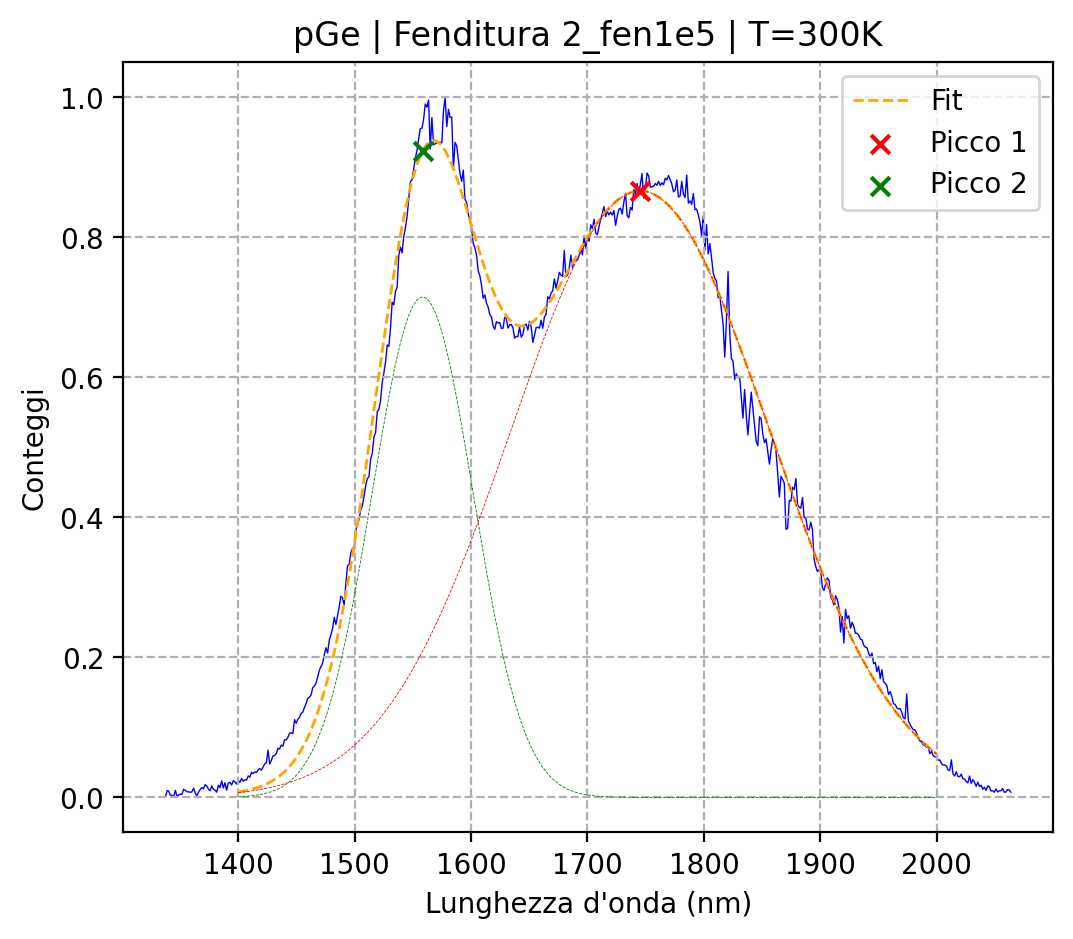

• Gaussiana  1
 - A = 0.8664261302243728
 - mu = 1745.4318194825933
 - sigma = 110.87005443522732
• Gaussiana  2
 - A = 0.7146763506758186
 - mu = 1558.4804368110827
 - sigma = 43.48879596207318
 - chi2rid = 0.6114815664868742


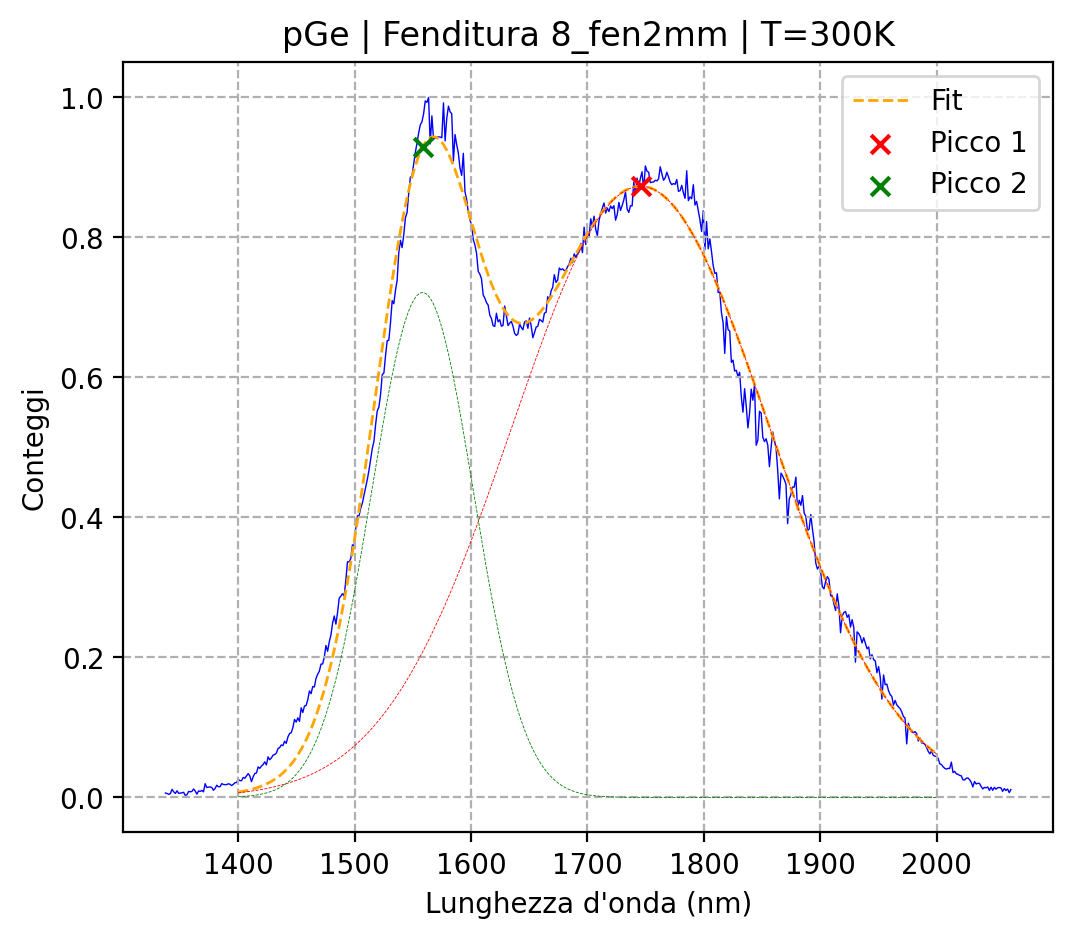

• Gaussiana  1
 - A = 0.8731071519069687
 - mu = 1745.7154573920316
 - sigma = 110.5228783752335
• Gaussiana  2
 - A = 0.7212646361233928
 - mu = 1558.403560029362
 - sigma = 43.66987023089767
 - chi2rid = 0.6061045010101053


In [7]:
for fen in arr_fen:
    
    waveln = pGe_fen[fen][0]
    counts = pGe_fen[fen][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5, zorder=1)
    
    ## FIT ##
    
    # isolo regione 1400 < x < 2000
    mask = (waveln > 1400) & (waveln < 2000)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    
    # impostazione parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (1, 1700, 50)
    ]
    
    # Set dei bounds
    low = [0, 1500, 10] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
    upp = [1, 1900, 200] * len(params)  # Limiti superiori
    
    popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, bounds=(low,upp), N_MAX_GAUSS=3)
        
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(1400, 2000, 500)
    y_plot = N_gaussiane(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1, zorder=2)
        
    # plotto i picchi individuati dal fit
    for i in range(0, round(len(popt)/3)): 
        x_picco = popt[3*i+1]
        # questo dà come ordinata al marker il valore della gaussiana in quella x
        y_picco = N_gaussiane(x_picco, *popt)
        # questo invece gli dà l'ampiezza del picco estratta dal fit (è orribile)
        # y_picco = popt[3*i]
        
        plt.scatter(x_picco, y_picco, 
                    color=col[i], 
                    marker='x',
                    label='Picco '+str(i+1),
                    s=45,
                    zorder=3
                    )
        
    # plotto singolarmente le gaussiane
    for i in range(0, round(len(popt)/3)):
        y_gauss = gaussiana(x_plot, popt[3*i], popt[3*i+1], popt[3*i+2])
        plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title('pGe | Fenditura ' + fen + ' | T=300K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])
    print(' - chi2rid =', chi2_reduced)

---

---

## pGe su TEMPO ACQUISIZIONE

#### Contenitore

In [8]:
arr_t_acq = ['0e1', '0e1', '0e5', '0e9', '0e9', '0e25']
arr_n_acq = ['2', '8', '2', '3', '15', '1']

pGe_acq = {}

#### Lettura

In [9]:
for t_acq, n_acq in zip (arr_t_acq, arr_n_acq):
    
    # Costruisco nome file
    name = build_name_pGe (t_acq=t_acq, n_acq=n_acq)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts)
    # Raccolgo
    pGe_acq[t_acq+'_'+n_acq] = (waveln, counts)

Ormai il codice l'ho scritto e mi prende di più modificarlo che scrivere questa nota:

pGe_acq['0e5_2'] ha i count vuoti: è proprio vuota la colonna nel file da cui sono estratti i dati. 

Può darsi che abbiamo sbagliato qualcosa in laboratorio.

#### Plot

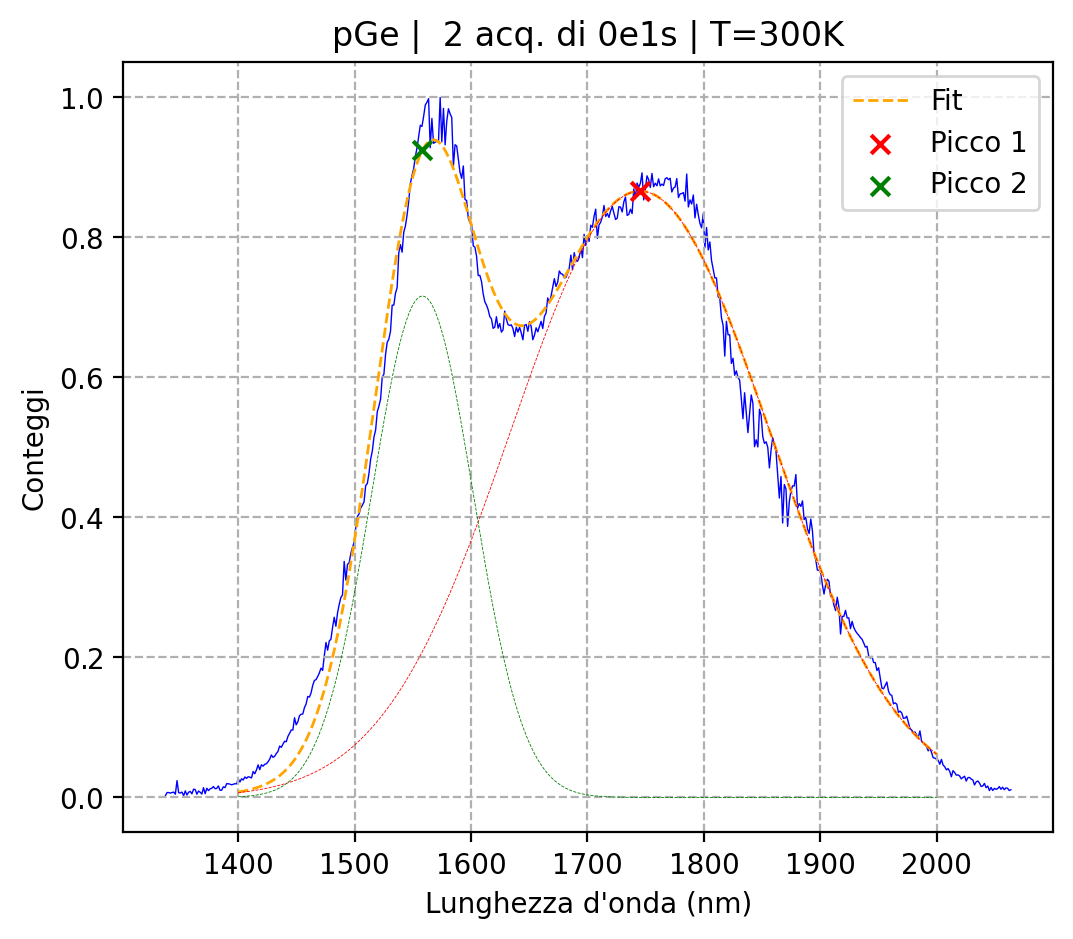

• Gaussiana  1
 - A = 0.8661715806874593
 - mu = 1745.3208563413002
 - sigma = 110.80899146685256
• Gaussiana  2
 - A = 0.7162423679647207
 - mu = 1558.3020709289117
 - sigma = 43.587987659839136
 - chi2rid = 0.6068183467122987


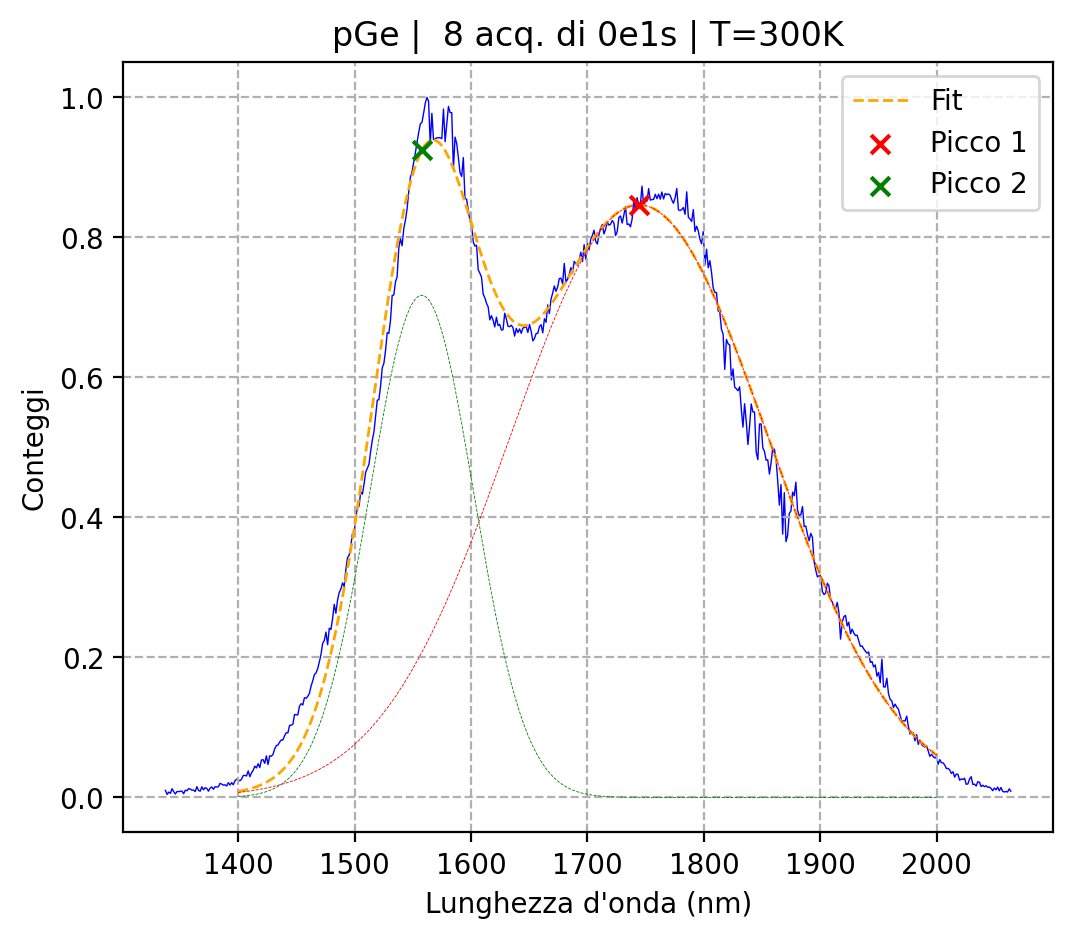

• Gaussiana  1
 - A = 0.8464551163556802
 - mu = 1744.3297329396737
 - sigma = 111.19989941823408
• Gaussiana  2
 - A = 0.7173267858591375
 - mu = 1557.6898516152055
 - sigma = 44.66300973486395
 - chi2rid = 0.6224604370635459

---------------------------------------
In 0e5 e 2 il massimo è zero
---------------------------------------



/var/folders/88/gfgbzsfs2m759nlsp4wspv400000gp/T/ipykernel_69649/61312754.py:8: RuntimeWarning: invalid value encountered in divide
  counts = counts / maximum


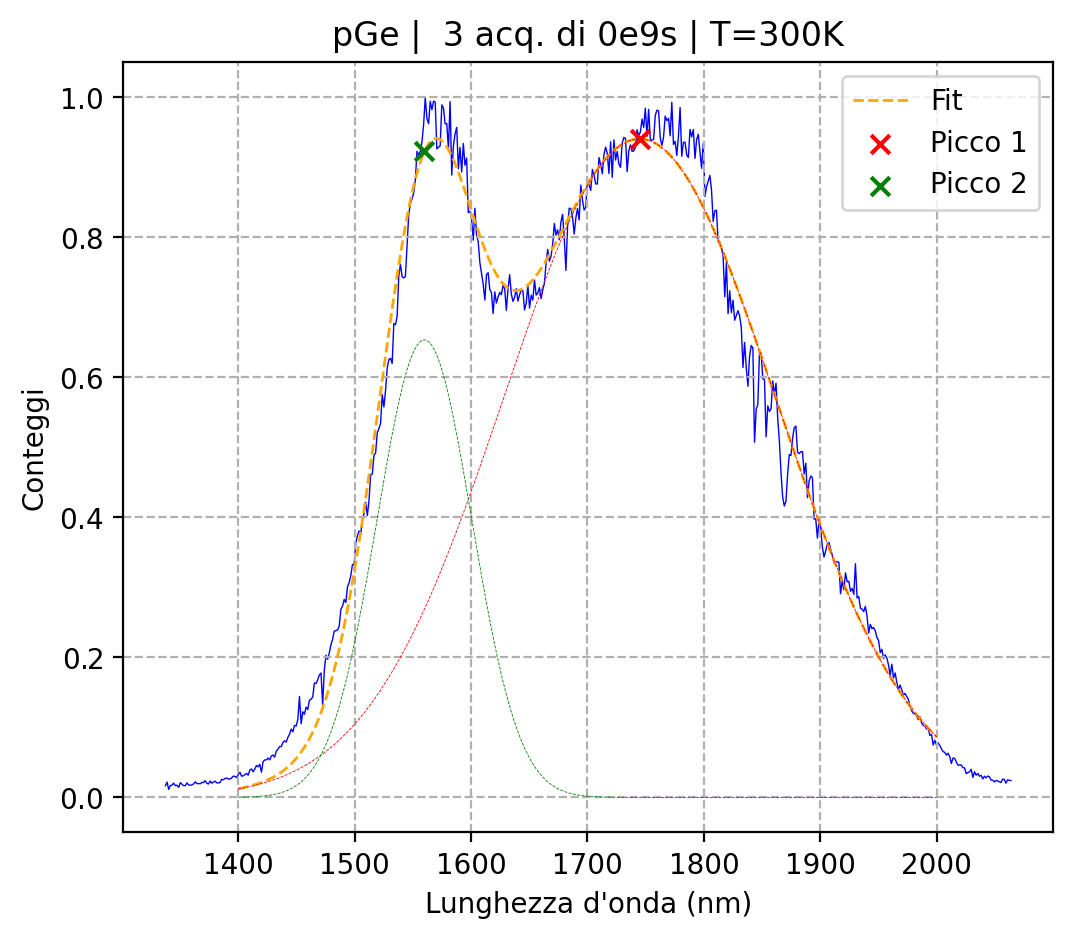

• Gaussiana  1
 - A = 0.9408300462655591
 - mu = 1744.797442761287
 - sigma = 116.79182990583551
• Gaussiana  2
 - A = 0.6535982279644272
 - mu = 1560.0428604585766
 - sigma = 40.73213149031939
 - chi2rid = 0.6860390529712721


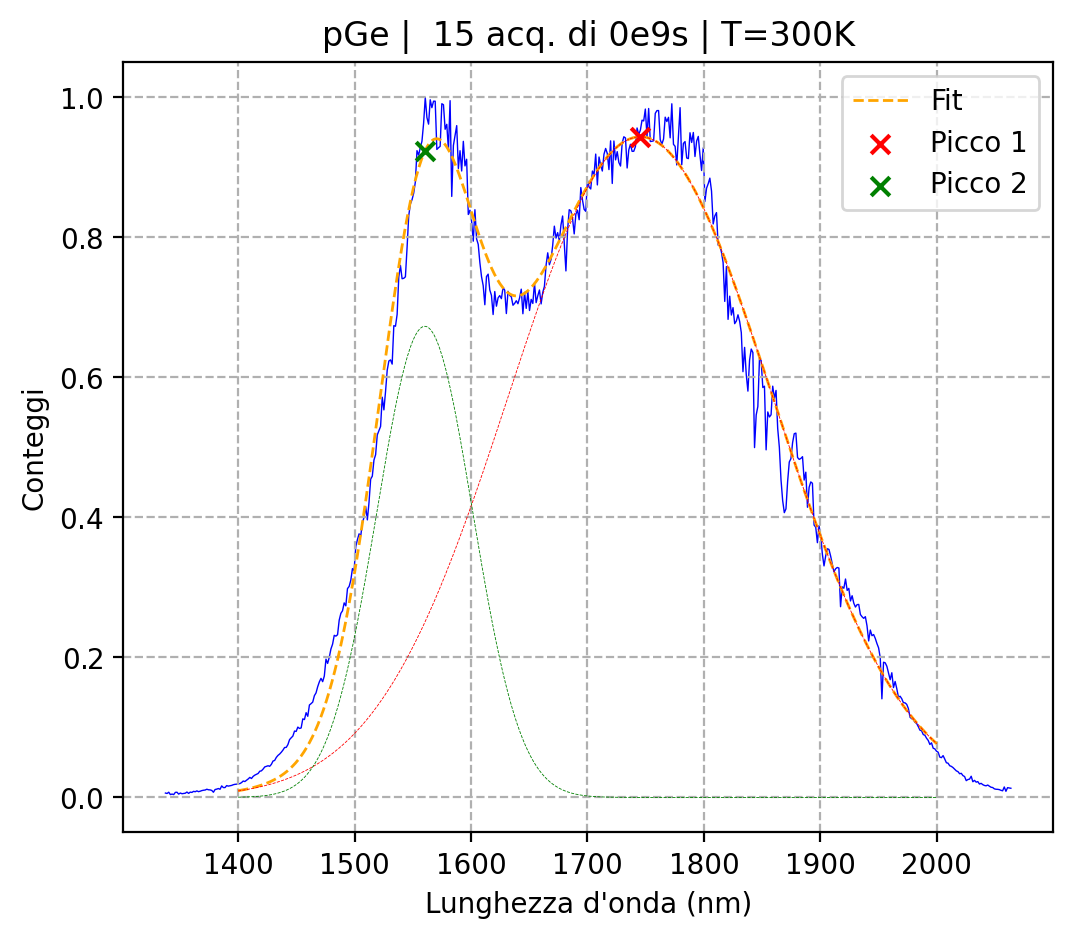

• Gaussiana  1
 - A = 0.9437911921177727
 - mu = 1745.4868853827368
 - sigma = 113.59643874390441
• Gaussiana  2
 - A = 0.6730626193979746
 - mu = 1560.345145466294
 - sigma = 41.14497543591673
 - chi2rid = 0.6394036184133878


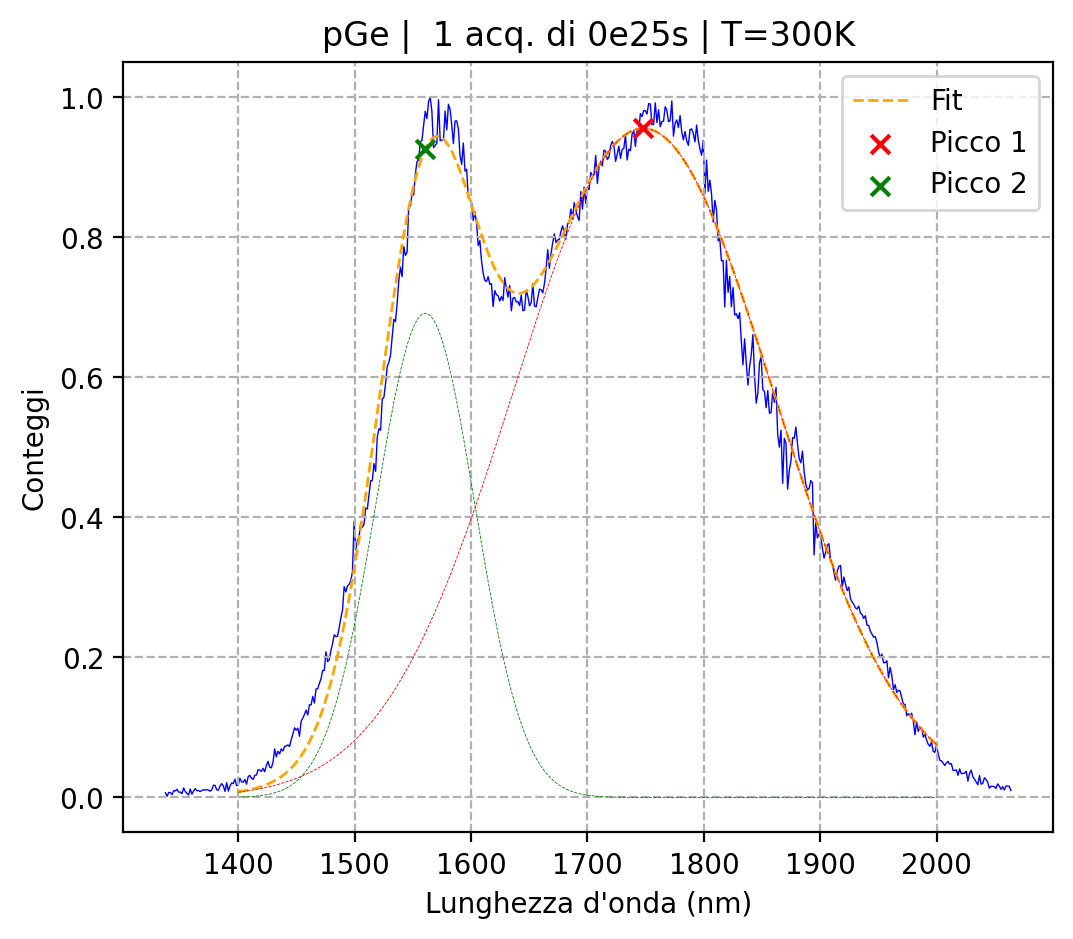

• Gaussiana  1
 - A = 0.9557818518438121
 - mu = 1747.9914173578295
 - sigma = 111.73707907336396
• Gaussiana  2
 - A = 0.6915801085554707
 - mu = 1560.808574856646
 - sigma = 42.42663792765134
 - chi2rid = 0.6101817860500462


In [10]:
for t_acq, n_acq in zip (arr_t_acq, arr_n_acq):
    
    waveln = pGe_acq[t_acq+'_'+n_acq][0]
    counts = pGe_acq[t_acq+'_'+n_acq][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum
    
    # per qualche motivo strano c'è un caso in cui il ma viene zero e esplode tutto
    if maximum == 0:
        print('\n---------------------------------------')
        print(f'In {t_acq} e {n_acq} il massimo è zero')
        print('---------------------------------------\n')
    else:
        # Plot
        plt.figure(figsize=(6,5), dpi=200)
        plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5, zorder=1)

        ## FIT ##

        # isolo regione 1400 < x < 2000
        mask = (waveln > 1400) & (waveln < 2000)
        x_fit = waveln[mask]
        y_fit = counts[mask]

        # impostazione parametri: ogni entrata è una tripla (a, mu, sigma)
        params = [
            (1, 1700, 50)
        ]

        # Set dei bounds
        low = [0, 1500, 10] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
        upp = [1, 1900, 200] * len(params)  # Limiti superiori

        popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, 
                                                   bounds=(low,upp), 
                                                   N_MAX_GAUSS=3,
                                                   n_acq=int(n_acq)
                                                   )
            
        ## PLOT CURVA FIT ##
        x_plot = np.linspace(1400, 2000, 500)
        y_plot = N_gaussiane(x_plot, *popt)
        plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1, zorder=2)
            
        # plotto i picchi individuati dal fit
        for i in range(0, round(len(popt)/3)): 
            x_picco = popt[3*i+1]
            # questo dà come ordinata al marker il valore della gaussiana in quella x
            y_picco = N_gaussiane(x_picco, *popt)
            # questo invece gli dà l'ampiezza del picco estratta dal fit (è orribile)
            # y_picco = popt[3*i]
            
            plt.scatter(x_picco, y_picco, 
                        color=col[i], 
                        marker='x',
                        label='Picco '+str(i+1),
                        s=45,
                        zorder=3
                        )
            
        # plotto singolarmente le gaussiane
        for i in range(0, round(len(popt)/3)):
            y_gauss = gaussiana(x_plot, popt[3*i], popt[3*i+1], popt[3*i+2])
            plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)

        ## OPZIONI GRAFICHE ##
        plt.title('pGe |  ' + n_acq + ' acq. di ' + t_acq + 's | T=300K')
        plt.xlabel("Lunghezza d'onda (nm)")
        plt.ylabel("Conteggi")
        plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
        plt.legend()
        plt.grid(linestyle='--')
        #plt.tight_layout()
        plt.show()


        ## PRINT RISULTATI FIT ##
        for i in range(0, round(len(popt)/3)):
            print('• Gaussiana ', i+1)
            print(' - A =', popt[3*i])
            print(' - mu =', popt[3*i+1])
            print(' - sigma =', popt[3*i+2])
        print(' - chi2rid =', chi2_reduced)

---

---